# Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
raw_data_path = os.path.join(project_root, 'src', 'Data', 'raw', 'youtube_ad_revenue_dataset.csv')

# Check if file exists
if not os.path.exists(raw_data_path):
    # Fallback for different CWD
    raw_data_path = os.path.join(os.getcwd(), '..', '..', 'src', 'Data', 'raw', 'youtube_ad_revenue_dataset.csv')

print(f"Loading data from: {raw_data_path}")


Loading data from: d:\Jeet\projects\Data_Science\Project\Project_Content_Monetization_Model\src\Data\raw\youtube_ad_revenue_dataset.csv


In [2]:
df = pd.read_csv(raw_data_path)
df.head()


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


## Dataset Info


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


## Missing Values


In [4]:
df.isnull().sum()


video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

## Duplicates


In [5]:
df.duplicated().sum()


np.int64(2400)

## Descriptive Statistics


In [6]:
df.describe()


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


## Correlation Matrix


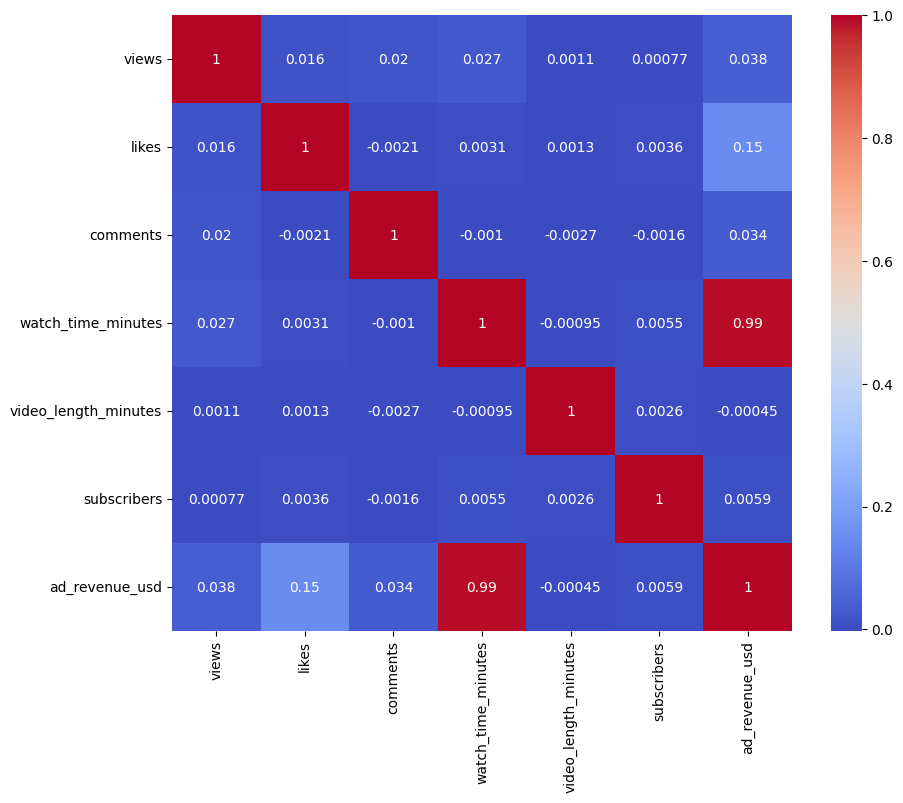

ad_revenue_usd          1.000000
watch_time_minutes      0.988874
likes                   0.146449
views                   0.038497
comments                0.034274
subscribers             0.005907
video_length_minutes   -0.000446
Name: ad_revenue_usd, dtype: float64


In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
print(corr_matrix['ad_revenue_usd'].sort_values(ascending=False))


## Outlier Detection


In [8]:
# Outlier Detection using IQR for ad_revenue_usd
Q1 = df['ad_revenue_usd'].quantile(0.25)
Q3 = df['ad_revenue_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['ad_revenue_usd'] < lower_bound) | (df['ad_revenue_usd'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")


Number of outliers: 0
Percentage of outliers: 0.00%


## Categorical Analysis


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 20:
        print(df[col].value_counts())
        print("-" * 10)


video_id: 5000 unique values
date: 365 unique values
category: 6 unique values
category
Education        20514
Music            20475
Tech             20444
Entertainment    20411
Gaming           20359
Lifestyle        20197
Name: count, dtype: int64
----------
device: 4 unique values
device
TV         30646
Mobile     30598
Tablet     30579
Desktop    30577
Name: count, dtype: int64
----------
country: 6 unique values
country
CA    20603
DE    20582
IN    20564
AU    20313
UK    20269
US    20069
Name: count, dtype: int64
----------
